In [3]:
# For data manipulation
import numpy as np
import pandas_datareader as data
import pandas as pd

# To plot
import matplotlib.pyplot as plt


# For web app
import streamlit as st

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
#df = pd.read_csv("AMZN.csv")#index_col="Date"

first = "2022-05-01"
end = "2022-11-11"

df = data.DataReader('TSLA', 'yahoo', first, end)
print(df)

NameError: name 'yf' is not defined

In [2]:
#df.index = pd.to_datetime(df['Date'])
#print(df)

In [3]:

df = df.drop(['Low'], axis='columns')
df = df.drop(['Close'], axis='columns')
df = df.drop(['Volume'], axis='columns')
df = df.drop(['High'], axis='columns')
#df = df.drop(['Date'], axis='columns')
time_index = df.reset_index()[['Date']] #replace utc with your index name
df = df.reset_index()
print(df)



          Date        Open   Adj Close
0   2022-05-02  286.923340  300.980011
1   2022-05-03  301.059998  303.083344
2   2022-05-04  301.313324  317.540009
3   2022-05-05  313.006653  291.093323
4   2022-05-06  295.666656  288.549988
..         ...         ...         ...
131 2022-11-07  208.649994  197.080002
132 2022-11-08  194.020004  191.300003
133 2022-11-09  190.779999  177.589996
134 2022-11-10  189.899994  190.720001
135 2022-11-11  186.000000  195.970001

[136 rows x 3 columns]


In [4]:
Date1 = df.drop(['Open','Adj Close'], axis='columns')
Date1 = Date1[Date1.columns[-1]].values
print(Date1)


['2022-05-02T00:00:00.000000000' '2022-05-03T00:00:00.000000000'
 '2022-05-04T00:00:00.000000000' '2022-05-05T00:00:00.000000000'
 '2022-05-06T00:00:00.000000000' '2022-05-09T00:00:00.000000000'
 '2022-05-10T00:00:00.000000000' '2022-05-11T00:00:00.000000000'
 '2022-05-12T00:00:00.000000000' '2022-05-13T00:00:00.000000000'
 '2022-05-16T00:00:00.000000000' '2022-05-17T00:00:00.000000000'
 '2022-05-18T00:00:00.000000000' '2022-05-19T00:00:00.000000000'
 '2022-05-20T00:00:00.000000000' '2022-05-23T00:00:00.000000000'
 '2022-05-24T00:00:00.000000000' '2022-05-25T00:00:00.000000000'
 '2022-05-26T00:00:00.000000000' '2022-05-27T00:00:00.000000000'
 '2022-05-31T00:00:00.000000000' '2022-06-01T00:00:00.000000000'
 '2022-06-02T00:00:00.000000000' '2022-06-03T00:00:00.000000000'
 '2022-06-06T00:00:00.000000000' '2022-06-07T00:00:00.000000000'
 '2022-06-08T00:00:00.000000000' '2022-06-09T00:00:00.000000000'
 '2022-06-10T00:00:00.000000000' '2022-06-13T00:00:00.000000000'
 '2022-06-14T00:00:00.000

In [5]:
df = df.drop(['Date'], axis='columns')

In [6]:
df.shape

(136, 2)

In [7]:
df.isnull().sum()

Open         0
Adj Close    0
dtype: int64

In [8]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
X.shape
print(X)
print(y)


[[286.92333984]
 [301.05999756]
 [301.31332397]
 [313.00665283]
 [295.66665649]
 [278.81668091]
 [273.10333252]
 [265.        ]
 [233.66667175]
 [257.82666016]
 [255.72000122]
 [249.11999512]
 [248.17333984]
 [235.66667175]
 [237.99667358]
 [218.33999634]
 [217.84333801]
 [207.94999695]
 [220.47332764]
 [241.08332825]
 [257.94665527]
 [251.72000122]
 [244.15666199]
 [243.22666931]
 [244.35333252]
 [234.        ]
 [240.08666992]
 [249.33999634]
 [235.15666199]
 [223.16667175]
 [218.28666687]
 [220.91667175]
 [222.73666382]
 [213.43333435]
 [224.60333252]
 [234.50332642]
 [237.90666199]
 [237.47000122]
 [249.3666687 ]
 [244.4833374 ]
 [230.5       ]
 [224.50999451]
 [227.        ]
 [223.        ]
 [230.77999878]
 [233.91999817]
 [242.33332825]
 [252.10333252]
 [236.84666443]
 [225.5       ]
 [234.89666748]
 [240.        ]
 [244.93666077]
 [245.        ]
 [246.78334045]
 [255.10667419]
 [276.22000122]
 [272.2166748 ]
 [266.51333618]
 [263.80999756]
 [280.06668091]
 [280.70001221]
 [301.27

In [9]:
split_percentage = 0.8
split = int(split_percentage*len(df))

D1 = Date1[:split]
# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]
D2 = Date1[split:]

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [11]:
print(f"intercept: {model.intercept_}")  # b0
print(f"slope: {model.coef_}")


intercept: 12.45304616186641
slope: [0.95152087]


In [12]:
y_pred = model.predict(X_test)

In [13]:
df = pd.DataFrame({'Date':D2, 'Actual':y_test, 'Predicted':y_pred})
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')
print(df)

                Actual   Predicted
Date                              
2022-10-05  240.809998  245.585170
2022-10-06  238.130005  240.285206
2022-10-07  223.070007  235.051841
2022-10-10  222.960007  225.527108
2022-10-11  216.500000  222.691580
2022-10-12  217.240005  217.344037
2022-10-13  221.720001  210.654847
2022-10-14  204.990005  225.603231
2022-10-17  219.350006  212.310484
2022-10-18  220.190002  230.827086
2022-10-19  222.039993  221.597337
2022-10-20  207.279999  210.635812
2022-10-21  214.440002  208.865983
2022-10-24  211.250000  208.295079
2022-10-25  222.419998  212.367587
2022-10-26  224.639999  221.216719
2022-10-27  225.089996  231.084001
2022-10-28  228.520004  226.925845
2022-10-31  227.539993  227.677554
2022-11-01  227.820007  235.156509
2022-11-02  214.979996  227.534817
2022-11-03  215.309998  213.566498
2022-11-04  207.470001  224.261598
2022-11-07  197.080002  210.987870
2022-11-08  191.300003  197.067130
2022-11-09  177.589996  193.984197
2022-11-10  190.7200

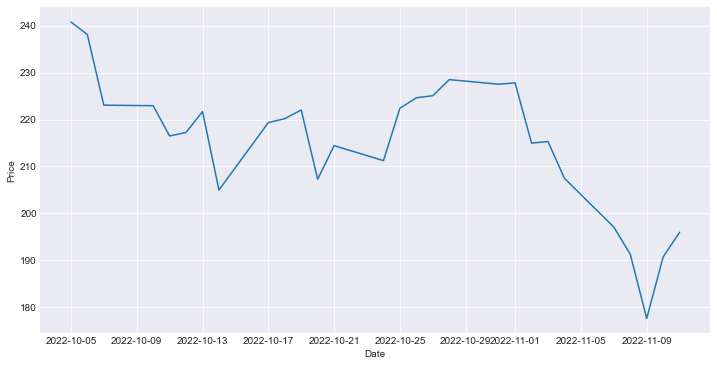

In [14]:
fig1 = plt.figure(figsize=(12,6))
plt.plot(df['Actual'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

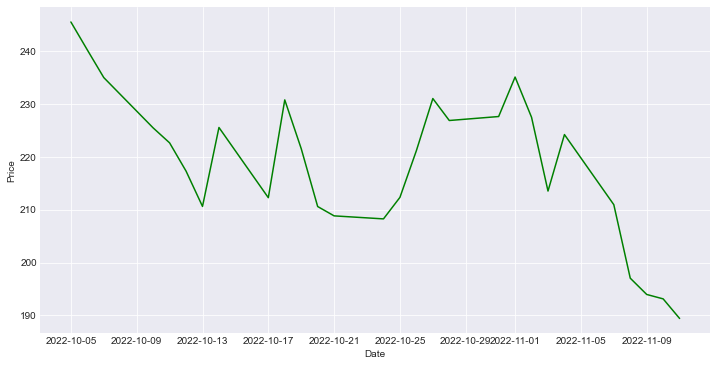

In [15]:
fig2 = plt.figure(figsize=(12,6))
plt.plot(df['Predicted'],'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

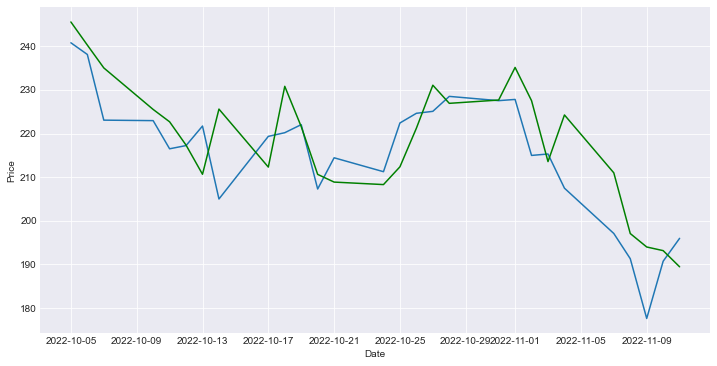

In [16]:
fig3 = plt.figure(figsize=(12,6))
plt.plot(df['Actual'])
plt.plot(df['Predicted'],'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 Score:",r2_score(y_test,y_pred))
st.write
#df['Actual']=df.head(-1)
#print(df['Actual'])

Mean squared error: 77.46419271816515
Root Mean squared error: 8.801374478918913
r2 Score: 0.619150632141386


<bound method WriteMixin.write of DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)>